# 以OWSLib套件串接國土測繪中心的WMS/WMTS服務
* Prerequisite: 需先安裝[OWSLib](http://geopython.github.io/OWSLib/)套件
* WMS (Web Map Service), WMTS (Web Map Tile Service)
* "WMTS也是地圖服務，和WMS不同的是WMTS是提供地圖的「圖磚」(Tiles，Tiled web map的概念)，也就是把地圖切成一小塊一小塊給用戶端，提高展示效能。" ~ 引用自[談互操作性及Web Map Service 標準](https://ithelp.ithome.com.tw/articles/10192948?sc=iThelpR)

## 無法藉此串接國土測繪中心的WMS服務

In [1]:
from owslib.wms import WebMapService

wms = WebMapService('http://maps.nlsc.gov.tw/S_Maps/wms')

ValueError: <Element Style at 0x7f51589ef648> missing name or title

## 改為串接國土測繪中心的WMTS服務

In [2]:
from owslib.wmts import WebMapTileService

url = 'http://wmts.nlsc.gov.tw/wmts'
wmts = WebMapTileService(url)
for item in wmts.contents:
    print(item, wmts[item].title)

B100000 1/100000 地形圖
B25000 1/25000 地形圖
B50000 1/50000 地形圖
B5000 1/5000基本地形圖
CITY 縣市界
EMAP01 臺灣通用電子地圖(灰階)
EMAP12 臺灣通用電子地圖透明(無門牌)
EMAP15 臺灣通用電子地圖(無門牌)
EMAP16 臺灣通用電子地圖(不含等高線及門牌)
EMAP2 臺灣通用電子地圖透明
EMAP5_OPENDATA 臺灣通用電子地圖(套疊等高線)opendata, 最大比例尺一萬八千分之一
EMAP5 臺灣通用電子地圖(套疊等高線)
EMAP6_OPENDATA 臺灣通用電子地圖(不含等高線)opendata, 最大比例尺一萬八千分之一
EMAP6 臺灣通用電子地圖(不含等高線)
EMAP7 taiwane-map(transparent)
EMAP8 taiwane-map(en)
EMAP96 臺灣通用電子地圖(高dpi字)
EMAP97 taiwan e-map(new)
EMAP98 臺灣通用電子地圖(新)
EMAP99_VT 臺灣通用電子地圖(文字向量)
EMAP9 臺灣通用電子地圖(無鐵公路)
EMAPX99 臺灣通用電子地圖(無文字)
EMAP 臺灣通用電子地圖
LANDSECT 段籍圖
LUIMAP01 國土利用調查-1類農業
LUIMAP02 國土利用調查-2類森林
LUIMAP03 國土利用調查-3類交通
LUIMAP04 國土利用調查-4類水利
LUIMAP05 國土利用調查-5類建築
LUIMAP06 國土利用調查-6類公共
LUIMAP07 國土利用調查-7類遊憩
LUIMAP08 國土利用調查-8類礦鹽
LUIMAP09 國土利用調查-9類其他
LUIMAP 國土利用調查成果圖
LandOffice 地政事務所轄區圖
MB5000 1/5000圖幅框
MOI_ASPECT 坡向圖
MOI_CONTOUR_2 等高線圖(2010-2015)
MOI_CONTOUR 等高線圖(2003-2005)
MOI_HILLSHADE 陰影圖
MOI_SHADERMAP 渲染圖
MOI_SLOPEP_GT30_2 坡度圖-30%坡(2010-2015)
MOI_SLOPEP_GT30 坡度圖-30%坡(2003-2005)
MOI_SLOPEP_LV7_2

In [3]:
# EMAP 臺灣通用電子地圖
# https://wmts.nlsc.gov.tw/wmts/EMAP/default/GoogleMapsCompatible/0/0/0
print(wmts.contents['EMAP'].resourceURLs)
print(wmts.contents['EMAP'].tilematrixsetlinks)
print(wmts.contents['EMAP'].styles)

[{'format': 'image/jpeg', 'resourceType': 'tile', 'template': 'https://wmts.nlsc.gov.tw/wmts/EMAP/{Style}/{TileMatrixSet}/{TileMatrix}/{TileRow}/{TileCol}'}]
{'GoogleMapsCompatible': <TileMatrixSetLink: GoogleMapsCompatible, tilematrixlimits={...}>}
{'default': {'isDefault': True, 'title': 'Default Style'}}


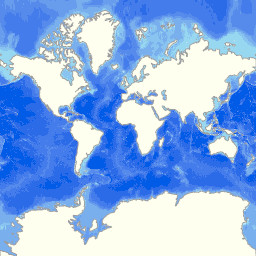

In [4]:
from IPython.display import Image

img = wmts.gettile(layer='EMAP',
                   tilematrixset='GoogleMapsCompatible',
                   tilematrix='0', 
                   row=0,
                   column=0)
Image(img.read())
# out = open('EMAP.jpeg', 'wb')
# bytes_written = out.write(img.read())
# out.close()

In [5]:
# CITY 縣市界
# https://wmts.nlsc.gov.tw/wmts/CITY/default/GoogleMapsCompatible/0/0/0
print(wmts.contents['CITY'].resourceURLs)
print(wmts.contents['CITY'].tilematrixsetlinks)
print(wmts.contents['CITY'].styles)

[{'format': 'image/png', 'resourceType': 'tile', 'template': 'https://wmts.nlsc.gov.tw/wmts/CITY/{Style}/{TileMatrixSet}/{TileMatrix}/{TileRow}/{TileCol}'}]
{'GoogleMapsCompatible': <TileMatrixSetLink: GoogleMapsCompatible, tilematrixlimits={...}>}
{'default': {'isDefault': True, 'title': 'Default Style'}}


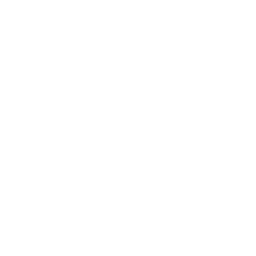

In [6]:
from IPython.display import Image

img = wmts.gettile(layer='CITY',
                   tilematrixset='GoogleMapsCompatible',
                   tilematrix='0', 
                   row=0,
                   column=0)
Image(img.read())
# out = open('CITY.png', 'wb')
# bytes_written = out.write(img.read())
# out.close()

In [7]:
# SCHOOL 各級學校範圍圖
# https://wmts.nlsc.gov.tw/wmts/SCHOOL/default/GoogleMapsCompatible/0/0/0
print(wmts.contents['CITY'].resourceURLs)
print(wmts.contents['CITY'].tilematrixsetlinks)
print(wmts.contents['CITY'].styles)

[{'format': 'image/png', 'resourceType': 'tile', 'template': 'https://wmts.nlsc.gov.tw/wmts/CITY/{Style}/{TileMatrixSet}/{TileMatrix}/{TileRow}/{TileCol}'}]
{'GoogleMapsCompatible': <TileMatrixSetLink: GoogleMapsCompatible, tilematrixlimits={...}>}
{'default': {'isDefault': True, 'title': 'Default Style'}}


In [8]:
# LUIMAP01 國土利用調查-1類農業
# https://wmts.nlsc.gov.tw/wmts/LUIMAP01/default/GoogleMapsCompatible/0/0/0
print(wmts.contents['LUIMAP01'].resourceURLs)
print(wmts.contents['LUIMAP01'].tilematrixsetlinks)
print(wmts.contents['LUIMAP01'].styles)

[{'format': 'image/png', 'resourceType': 'tile', 'template': 'https://wmts.nlsc.gov.tw/wmts/LUIMAP01/{Style}/{TileMatrixSet}/{TileMatrix}/{TileRow}/{TileCol}'}]
{'GoogleMapsCompatible': <TileMatrixSetLink: GoogleMapsCompatible, tilematrixlimits={...}>}
{'default': {'isDefault': True, 'title': 'Default Style'}}
